_______
_______


# <center>Chapter 8: Applications of Partial Derivatives <br><sup><sup><br><br>
_______
_______

In [2]:
import numpy as np
import pandas as pd
import math as m
import matplotlib
import statistics as stats
import scipy.stats as scistats
import matplotlib.pyplot as plt
import matplotlib.colors as color
import os
import sys
import math
import netCDF4 as nc
import statsmodels.api as sm
import shapely
import statistics
import warnings
warnings.filterwarnings("ignore")

from sympy import symbols, diff
from scipy.optimize import fsolve
from matplotlib import cm as cm1
from scipy import optimize as opt
from pandas import read_table
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon
from scipy.ndimage import gaussian_filter
from sklearn.linear_model import LinearRegression

In [3]:
# Style Dictionary to standarize plotting scheme 
# between different python scripts 
styledict = {'xtick.labelsize':21,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':21,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':22,
             'axes.titlesize':22,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

## Figure 8.1: Dome and saddle surfaces

In [4]:
# 8.1(a)

# sequence of 51 evenly spaced values from [-1,1]
x = y = np.linspace(-1,1,51)

# define function z
def z(x, y):
    return(5 - x**2 - 2*y**2)

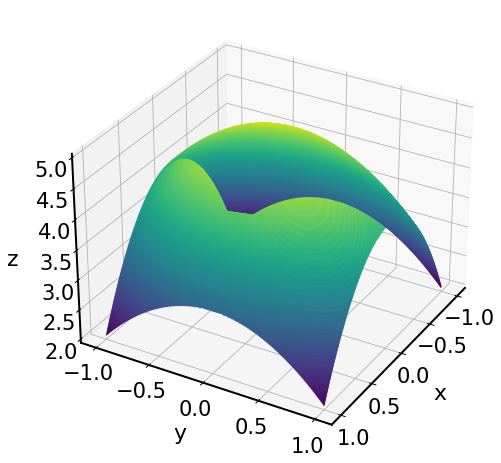

In [5]:
# plot
X, Y = np.meshgrid(x, y)
Z = z(X,Y)

fig = plt.figure(figsize = (8,24))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z.T, 300, cmap='viridis', edgecolor='none')
ax.set_xlabel('x', labelpad = 15)
ax.set_ylabel('y', labelpad = 15)
ax.set_zlabel('z', labelpad = 15)

ax.view_init(30, 30)
plt.show()

In [6]:
# 8.1(b)

# redefine function z
def z(x, y):
    return(5 - x**2 + 2*y**2)

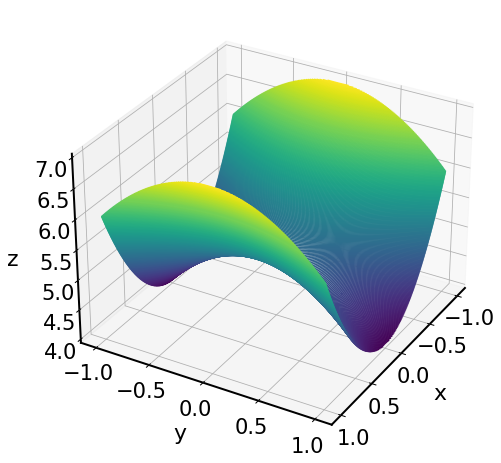

In [7]:
# plot
X, Y = np.meshgrid(x, y)
Z = z(X,Y)

fig = plt.figure(figsize = (8,24))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z.T, 300, cmap='viridis', edgecolor='none')
ax.set_xlabel('x', labelpad = 15)
ax.set_ylabel('y', labelpad = 15)
ax.set_zlabel('z', labelpad = 15)

ax.view_init(30, 30)
plt.show()

## Figure 8.2: A surface in 3D and it's filled contour map

In [64]:
# 8.2(a)

# define variables
n = 301
x = np.linspace(-2,2,n)
y = np.linspace(-2,2,n)

# define function f(x,y)
def f(x,y):
    return(x**4 + 2*y**4 - 8*x*y + 1)

X, Y = np.meshgrid(x, y)
F = f(X,Y)
W = F.copy()

# replace values of F > 4 with None
F = np.where(F>4, None, F) 

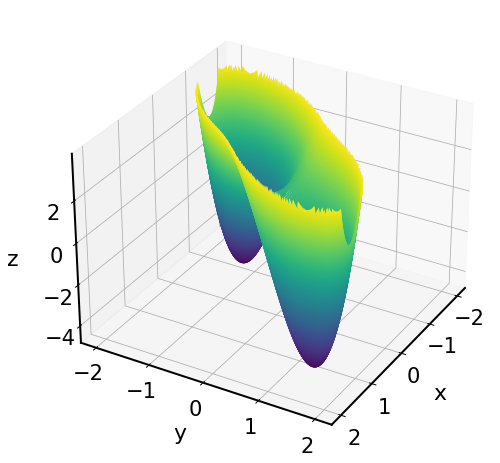

In [65]:
# plot
fig = plt.figure(figsize = (8,24))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, F.T, 300, cmap='viridis', edgecolor='none')
ax.set_xlabel('x', labelpad = 15)
ax.set_ylabel('y', labelpad = 15)
ax.set_zlabel('z', labelpad = 15)

ax.view_init(30, 30)
plt.show()

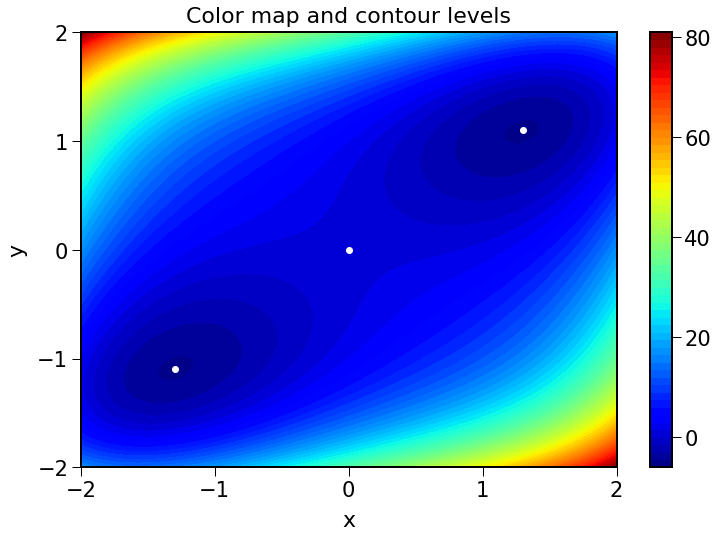

In [71]:
# 8.2(b)

plt.contourf(X, Y, W, levels=60, cmap='jet')
plt.colorbar(ticks=[0,20,40,60,80])

plt.scatter([0,1.3, -1.3],[0,1.1,-1.1], color = 'w')

plt.title("Color map and contour levels", pad = 10)
plt.xlabel("x", labelpad = 10)
plt.xticks([-2,-1,0,1,2])
plt.ylabel("y", labelpad = 10)
plt.yticks([-2,-1,0,1,2])

plt.show()

## 8.3: Constrained extrema

In [82]:
# 8.3(a)

# define variables
x = np.linspace(-2,2,51)
y = np.linspace(-2,2,51)

def z(x,y):
    return(5 - x**2 + 2*y**2)

X, Y = np.meshgrid(x, y)
Z = z(X,Y)

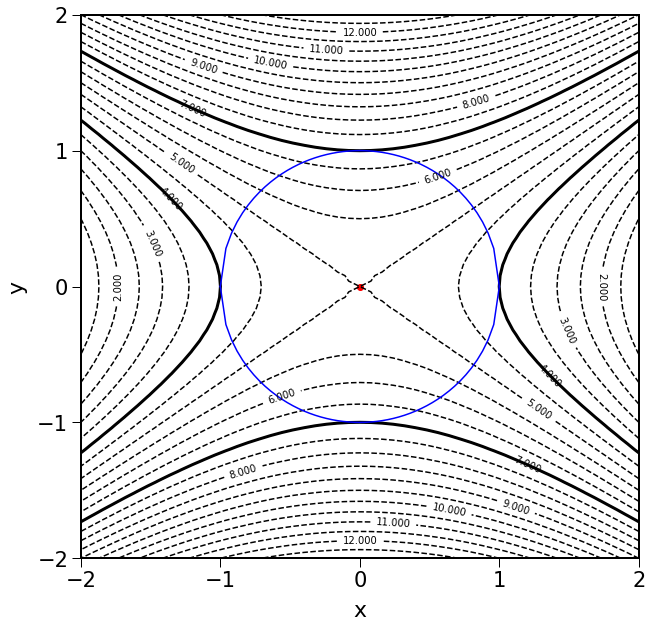

In [111]:
# 8.2(b)

# set up graph
plt.figure(figsize = (10,10))

# plot contour graphs
CS = plt.contour(X, Y, Z, levels = 23, colors = 'black', linestyles = 'dashed')
plt.contour(X,Y, Z, levels = [4,7], colors = 'k', linewidths = 3)
plt.clabel(CS,CS.levels[::2], fontsize=10,colors='k')

# plot top half of circle
plt.plot(x/2, np.sqrt(1-(x/2)**2), color = 'blue')
# plot lower half of circle
plt.plot(x/2, -np.sqrt(1-(x/2)**2), color = 'blue')

# plot point
plt.scatter(0,0, color = 'r')

# add labels
plt.xlabel("x", labelpad = 10)
plt.xticks([-2,-1,0,1,2])
plt.ylabel("y", labelpad = 10)
plt.yticks([-2,-1,0,1,2])

plt.show()

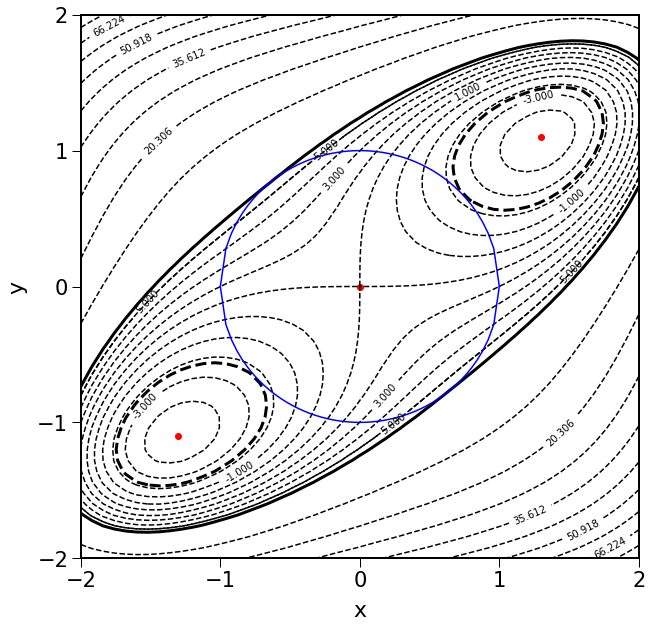

In [162]:
# 8.2(b)

# redefine function
def f(x,y):
    return(x**4 + 2*y**4 - 8*x*y + 1)

F = f(X,Y)

# set up graph
plt.figure(figsize = (10,10))

# plot contour graphs
CS = plt.contour(X, Y, F, levels = np.linspace(-5,5,11), colors = 'black', linestyles = 'dashed')
CS2 = plt.contour(X,Y, F, levels = np.linspace(5,80)[::5], colors = 'k', linestyles = 'dashed')
plt.contour(X,Y, F, levels = [-2.3,5.8], colors = 'k', linewidths = 3)
plt.clabel(CS,CS.levels[::2], fontsize=10,colors='k')
plt.clabel(CS2,CS2.levels[::2], fontsize=10,colors='k')

# plot top half of circle
plt.plot(x/2, np.sqrt(1-(x/2)**2), color = 'blue')
# plot lower half of circle
plt.plot(x/2, -np.sqrt(1-(x/2)**2), color = 'blue')

# plot point
plt.scatter([0,1.3,-1.3],[0,1.1,-1.1], color = 'r')

# add labels
plt.xlabel("x", labelpad = 10)
plt.xticks([-2,-1,0,1,2])
plt.ylabel("y", labelpad = 10)
plt.yticks([-2,-1,0,1,2])

plt.show()

## Linear approximation: sectoin 8.3

In [163]:
def f(x,y):
    return(1-x**2 - y**2)

def L(x,y):
    return(-2*x - 2*y + 3)

print(f(1.2,0.9))
print(L(1.2,0.9))

# 4 percent relative error
print(100*(f(1.2,0.9)-L(1.2,0.9))/f(1.2,0.9))

-1.25
-1.2000000000000002
3.999999999999986
